<a href="https://colab.research.google.com/github/k2h2j3/My-First-AI/blob/master/catdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 데이터구성(개,고양이)
- 총 3000개(train 2000, valisation 1000)으로 구성된 데이터셋

-각각의 데이터는 절반은 dog, 절반은 cat
-


In [57]:
import os

In [58]:
train_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/train'
test_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test'
validation_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation'

train_dogs_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/train/dogs'
train_cats_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/train/cats'

test_dogs_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test/dogs'
test_cats_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/test/cats'

validation_dogs_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation/dogs'
validation_cats_dir = 'drive/MyDrive/Colab Notebooks/dogs_vs_cats_small/validation/cats'


In [59]:
#listdir() 해당폴더에 있는 파일을 가져온다
print("훈련 개 데이터 수 : {}".format(len(os.listdir(train_dogs_dir))))
print("훈련 고양이 데이터 수 : {}".format(len(os.listdir(train_cats_dir))))

print("테스트 개 데이터 수 : {}".format(len(os.listdir(test_dogs_dir))))
print("테스트 고양이 데이터 수 : {}".format(len(os.listdir(test_cats_dir))))

print("검증 개 데이터 수 : {}".format(len(os.listdir(validation_dogs_dir))))
print("검증 고양이 데이터 수 : {}".format(len(os.listdir(validation_cats_dir))))

훈련 개 데이터 수 : 1000
훈련 고양이 데이터 수 : 1000
테스트 개 데이터 수 : 11
테스트 고양이 데이터 수 : 11
검증 개 데이터 수 : 500
검증 고양이 데이터 수 : 500


#### 이미지 전처리
-이미지를 같은 크기로 만들어 주어야 한다
-0~255 범위의 픽셀값을 0~1 사이의 범위로 변환
-라벨링(데이터를 수치화)
-imageDataGenerator() 함수를 사용


In [60]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [61]:
train_gen = ImageDataGenerator( rescale = 1./255)
val_gen = ImageDataGenerator( rescale = 1./255)
test_gen = ImageDataGenerator( rescale = 1./255)

In [62]:
# flow_from_directory: 폴더에서 이미지 가져오기
# 폴더명, 이미지 크기, 한번에 변환 할 이미지 수, 라벨링 모드
# 이진분류 = binary, 다중 분류 = categorical 
# 라벨 번호는 0부터 시작(cat은 0, dog는 1)
train_generator = train_gen.flow_from_directory(train_dir,
                              target_size =(200,200),
                              batch_size=32,
                              class_mode = 'binary')
val_generator = val_gen.flow_from_directory( validation_dir,
                            target_size = (200,200),
                            batch_size=32,
                            class_mode =  'binary')
test_generator = test_gen.flow_from_directory( test_dir,
                            target_size = (200,200),
                            batch_size=32,
                            class_mode =  'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [63]:
# 라벨링 결과

print(train_generator.class_indices)
print(test_generator.class_indices)
print(val_generator.class_indices)


{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


초기화를 위한 seed 설정

In [64]:
import numpy as np
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer, Flatten

### mlp로 구현해보기

In [ ]:
# 1. 신경망 구조 설계
model = Sequential() #뼈대

# 입력층
model.add(InputLayer(input_shape=(150,150,3))) #Dense(input_dim)
model.add(Flatten()) #이미지를 1차원으로 핀다
model.add(Dense(units=64, activation='relu'))
# 은닉층
model.add(Dense(units=64, activation='relu'))
# 출력층
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary() #모델 요약 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 64)                4320064   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,324,289
Trainable params: 4,324,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 2. 모델 학습/평가 방법 설정
model.compile(
    loss='binary_crossentropy',
    optimizer= 'adam',
    metrics = ['accuracy']    
)

In [ ]:
# 3. 학습
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch = 50,# 한번 epoch에 저장한 데이터수
                    epochs = 10, #우리가 가지고 있는 전체데이터를 학습시켰을때
                    validation_data = val_generator, #검증 데이터로 활용
                    validation_steps = 25)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10


KeyboardInterrupt: ignored

[]

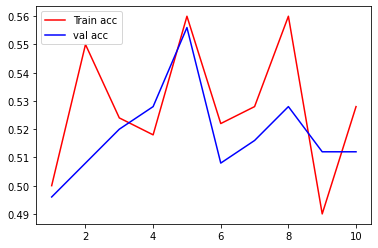

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epoch = range(1, len(acc)+1) #정확도의 개수

plt.plot(epoch, acc, c='red', label = 'Train acc') # 훈련 데이터 정확도
plt.plot(epoch, val_acc, c= 'blue', label = 'val acc') # 검증 데이터 정확도
plt.legend() #범례
plt.plot()


### CNN을 입력층으로 한 신경망 설계

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
# Con2D : 특징찾기
# MaxPooling2D: 불필요한 부분 삭제
# Flatten : 데이터를 1차원으로 펴줌

In [71]:
from matplotlib.cbook import flatten
c_model = Sequential()

# 입력층(CNN)
# 특징을 도드라지게 해준다
c_model.add(Conv2D(filters = 16, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (200,200,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움 
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))
#불필요한 부분 삭제
c_model.add(MaxPooling2D(pool_size = (2,2)))

c_model.add(Conv2D(filters = 32, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (200,200,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움(입력이미지크기=출력이미지크기)
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))

c_model.add(MaxPooling2D(pool_size = (2,2)))

c_model.add(Conv2D(filters = 64, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (200,200,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움(입력이미지크기=출력이미지크기)
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))

c_model.add(MaxPooling2D(pool_size = (2,2)))

c_model.add(Conv2D(filters = 64, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (200,200,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움(입력이미지크기=출력이미지크기)
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))

c_model.add(MaxPooling2D(pool_size = (2,2)))

c_model.add(Conv2D(filters = 64, # 사진에서 찾을 특성 개수
                   kernel_size = (3,3), # 한번에 확인할 픽셀의 수
                   input_shape = (200,200,3), # 입력 데이터의 크기
                   padding = 'same', # 가장 자리를 0으로 채움(입력이미지크기=출력이미지크기)
                  # same : 입력데이터의 크기와 동일하게 맞춰준다
                   activation = 'relu'))

c_model.add(MaxPooling2D(pool_size = (2,2)))

# 1차원으로 데이터 축소
c_model.add(Flatten())

#은닉층
c_model.add(Dense(units=512, activation = 'relu'))

#출력층
c_model.add(Dense(units=1, activation= 'sigmoid'))

c_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 25, 25, 64)     

In [72]:
c_model.compile(loss='binary_crossentropy',
                optimizer = 'adam',
                metrics=['accuracy'])

In [73]:
c_histroy = c_model.fit_generator(generator=train_generator,
            steps_per_epoch=50,
            epochs=10,
            validation_data = val_generator,
            validation_steps = 25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
50/50 [==============================] - 80s 2s/step - loss: 0.6951 - accuracy: 0.5189 - val_loss: 0.6938 - val_accuracy: 0.4913
Epoch 2/10
50/50 [==============================] - 79s 2s/step - loss: 0.6936 - accuracy: 0.5056 - val_loss: 0.6933 - val_accuracy: 0.4963
Epoch 3/10
50/50 [==============================] - 78s 2s/step - loss: 0.6885 - accuracy: 0.5467 - val_loss: 0.6635 - val_accuracy: 0.6275
Epoch 4/10
50/50 [==============================] - 78s 2s/step - loss: 0.6717 - accuracy: 0.5739 - val_loss: 0.6879 - val_accuracy: 0.5512
Epoch 5/10
50/50 [==============================] - 78s 2s/step - loss: 0.6426 - accuracy: 0.6231 - val_loss: 0.6097 - val_accuracy: 0.6787
Epoch 6/10
50/50 [==============================] - 78s 2s/step - loss: 0.5983 - accuracy: 0.6837 - val_loss: 0.5642 - val_accuracy: 0.7038
Epoch 7/10
50/50 [==============================] - 78s 2s/step - loss: 0.5549 - accuracy: 0.7172 - val_loss: 0.5658 - val_accuracy: 0.7163
Epoch 8/10
50/50 [==

[]

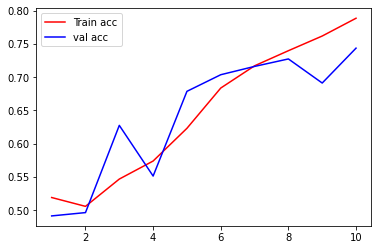

In [74]:
import matplotlib.pyplot as plt
acc = c_histroy.history['accuracy']
val_acc = c_histroy.history['val_accuracy']

epoch = range(1, len(acc)+1) #정확도의 개수

plt.plot(epoch, acc, c='red', label = 'Train acc') # 훈련 데이터 정확도
plt.plot(epoch, val_acc, c= 'blue', label = 'val acc') # 검증 데이터 정확도
plt.legend() #범례
plt.plot() 

